In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("C:Weight of copper dataset.csv")
df.head()

,Unnamed: 0,power_rating,weight_of_copper,category
0,0,16.46,34.69,high
1,1,12.52,28.78,high
2,2,7.66,21.48,high
3,3,21.09,41.64,high
4,4,24.43,46.64,high


In [6]:
df = df.drop("Unnamed: 0",axis = 1)
df.head()

,power_rating,weight_of_copper,category
0,16.46,34.69,high
1,12.52,28.78,high
2,7.66,21.48,high
3,21.09,41.64,high
4,24.43,46.64,high


In [8]:
K = {'low':0,'high':1}
df['category'] = df['category'].map(K)
X = df[["power_rating","weight_of_copper"]]
Y = df[["category"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state=42)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train.values.ravel())


RandomForestClassifier(max_depth=2, random_state=0)

In [10]:
y_pred = clf.predict (X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
print("accuracy score",accuracy_score(y_test, y_pred))
print("mean_squared_error",mean_squared_error(y_test, y_pred))
from sklearn.metrics import confusion_matrix



accuracy score 1.0
mean_squared_error 0.0


In [14]:
y_true = y_test
data = confusion_matrix(y_true, y_pred)
data


array([[  3,   0],
       [  0, 162]], dtype=int64)

In [16]:
import seaborn as sn
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index =np.unique(y_true))
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
df_cm




Predicted,0,1
Actual,,
0,3,0
1,0,162


<Figure size 1000x700 with 0 Axes>

<Axes: xlabel='Predicted', ylabel='Actual'>

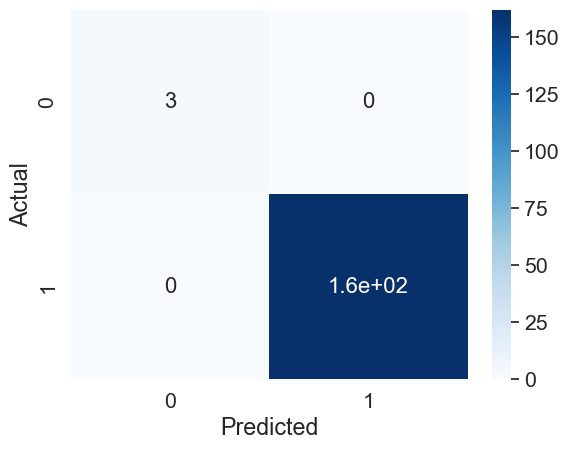

In [18]:
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws= {"size":16})
